# One Way Slab check ACI 318-19

**Define concrete and steel materials, and then assign the beam**

In [1]:
from mento import Concrete_ACI_318_19, SteelBar, OneWaySlab, Node, Forces
from mento import MPa, cm, kN, mm, kNm
# Define materials and beam section
conc = Concrete_ACI_318_19(name="H25", f_c=25*MPa)
steel = SteelBar(name="ADN 500", f_y=420 * MPa)
slab = OneWaySlab(label="101",concrete=conc,steel_bar=steel,width=150*cm, height=20*cm, c_c = 20*mm)
slab.data

Slab 101, $b$=150.00 cm, $h$=20.00 cm, $c_{c}$=2.00 cm,                             Concrete H25, Rebar ADN 500.

**Set longitudinal reinforcement**

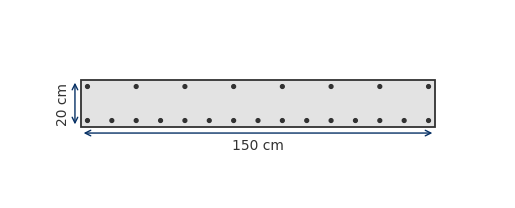

In [2]:
# Set bottom rebar
slab.set_slab_longitudinal_rebar_bot(d_b1=16 * mm, s_b1 = 10* cm)
# Set top rebar
slab.set_slab_longitudinal_rebar_top(d_b1=16 * mm, s_b1 = 20 * cm)

# Plot the beam geometry and reinforcement
slab.plot()

**Create node and assign slab section and list of forces**

In [3]:
# Define forces
f1 = Forces(label='1.4D', V_z=40*kN, M_y=60*kNm)
f2 = Forces(label='1.2D+1.6L', V_z=50*kN, M_y=-60*kNm)
forces_list=[f1, f2]
# Create node and assign beam section and list of forces
node_1 = Node(section=slab, forces=[f1, f2])
node_1

Node ID: 1 - Section label: 101
Forces Applied:
  - Force ID: 1, Label: 1.4D, N_x: 0.00 kN, V_z: 40.00 kN, M_y: 60.00 kN·m
  - Force ID: 2, Label: 1.2D+1.6L, N_x: 0.00 kN, V_z: 50.00 kN, M_y: -60.00 kN·m

**Perform shear and bending checks**

In [4]:
# Perform all checks 
node_1.check_shear()
node_1.check_flexure()
# Print results in Markdown format
node_1.results

Slab 101, $b$=150.00 cm, $h$=20.00 cm, $c_{c}$=2.00 cm,                             Concrete H25, Rebar ADN 500.

Top longitudinal rebar: 8Ø16, $A_{s,top}$ = 16.08 cm², $M_u$ = -60 kNm, $\phi M_n$ = 98.13 kNm → $\color{#439b00}{\text{DCR}=0.61}$ 

Bottom longitudinal rebar: 15Ø16, $A_{s,bot}$ = 30.16 cm², $M_u$ = 60 kNm, $\phi M_n$ = 173.43 kNm → $\color{#439b00}{\text{DCR}=0.35}$ 

Shear reinforcing not assigned, $A_v$=0.0 cm²/m, $V_u$=50 kN, $\phi V_n$=127.93 kN → $\color{#439b00}{\text{DCR}=0.39}$ 

In [5]:
# Print shear results in more detailed format in a DataFrame
node_1.check_shear()

,Label,Comb.,"Av,min","Av,req",Av,Vu,Nu,ØVc,ØVs,ØVn,ØVmax,Vu≤ØVmax,Vu≤ØVn,DCR
0,,,cm²/m,cm²/m,cm²/m,kN,kN,kN,kN,kN,kN,,,
1,101,1.4D,0.0,0.0,0.0,40,0,157.75,0,157.75,796.3,True,True,0.254
2,101,1.2D+1.6L,0.0,0.0,0.0,50,0,127.93,0,127.93,766.48,True,True,0.391


In [6]:
# Print flexure results in more detailed format in a DataFrame
node_1.check_flexure()

,Label,Comb.,Position,"As,min","As,req top","As,req bot",As,Mu,ØMn,Mu≤ØMn,DCR
0,,,,cm²,cm²,cm²,cm²,kNm,kNm,,
1,101,1.4D,Bottom,8.6,0.0,9.58,30.16,60,173.43,True,0.346
2,101,1.2D+1.6L,Top,8.6,9.58,0.0,16.08,-60,98.13,True,0.611


**Export table results to Excel**

In [7]:
node_1.check_shear().to_excel('ACI 318-19 shear_results.xlsx')
node_1.check_flexure().to_excel('ACI 318-19 flexure_results.xlsx')

**View complete and detailed results for the limiting case of the list of forces**

In [8]:
# View detailed shear results
node_1.shear_results_detailed()

===== BEAM SHEAR DETAILED RESULTS =====
Materials                            Variable     Value  Unit
----------------------------------  ----------  -------  ------
Section Label                                       101
Concrete strength                       fc           25  MPa
Steel reinforcement yield strength      fy          420  MPa
Concrete density                        wc         2500  kg/m³
Normalweight concrete                   λ             1
Safety factor for shear                 Øv         0.75 

Geometry                     Variable     Value  Unit
--------------------------  ----------  -------  ------
Section height                  h            20  cm
Section width                   b           150  cm
Clear cover                     cc            2  cm
Longitudinal tension rebar      As        16.08  cm² 

Design forces                     Variable     Value  Unit
-------------------------------  ----------  -------  ------
Axial, positive for compression      N

In [9]:
# View detailed flexure results
node_1.flexure_results_detailed()

===== BEAM FLEXURE DETAILED RESULTS =====
Materials                            Variable     Value  Unit
----------------------------------  ----------  -------  ------
Section Label                                       101
Concrete strength                       fc           25  MPa
Steel reinforcement yield strength      fy          420  MPa 

Geometry                  Variable     Value  Unit
-----------------------  ----------  -------  ------
Section height               h            20  cm
Section width                b           150  cm
Clear cover                  cc            2  cm
Mechanical top cover       cm,top        2.8  cm
Mechanical bottom cover    cm,bot        2.8  cm 

Design_forces       Variable     Value  Unit
-----------------  ----------  -------  ------
Top max moment       Mu,top        -60  kNm
Bottom max moment    Mu,bot         60  kNm 

Check                     Unit     Value  Min.    Max.    Ok?
-----------------------  ------  -------  ------  ------ 

**Export detailed results to a Word document**

In [10]:
node_1.shear_results_detailed_doc()
node_1.flexure_results_detailed_doc()